In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime
from pathlib import Path
from datetime import timedelta

data_path = Path.cwd() / f'data/BTCUSDT/training-data-2h.csv'
from_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
to_date = from_date + timedelta(days=520)

df = pd.read_csv(data_path)
df['OpenTime'] = pd.to_datetime(df['Open time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop(['Open time'], axis=1)
df = df[(df.OpenTime >= from_date) & (df.OpenTime <= to_date)]

In [3]:
df = df.set_index('OpenTime')

In [4]:
df

,Open,High,Low,Close,Volume
OpenTime,,,,,
2018-01-01 01:00:00,13715.65,13715.65,13155.38,13203.06,827.05
2018-01-01 03:00:00,13203.00,13611.27,13200.00,13410.03,849.15
2018-01-01 05:00:00,13434.98,13699.00,13322.15,13558.99,745.04
2018-01-01 07:00:00,13539.00,13818.55,13510.00,13570.35,557.18
2018-01-01 09:00:00,13569.98,13735.24,13400.00,13616.99,484.91
...,...,...,...,...,...
2019-06-04 16:00:00,8025.04,8027.24,7916.00,7941.11,3989.79
2019-06-04 18:00:00,7941.91,7976.99,7606.48,7621.24,11440.77
2019-06-04 20:00:00,7621.24,7736.00,7531.11,7621.46,9125.27


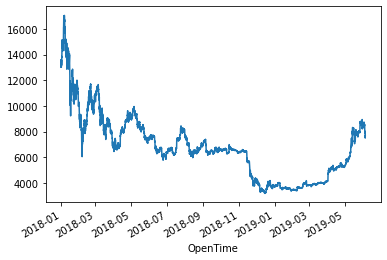

In [6]:
df['Close'].plot()

In [7]:
type(df.iloc[0].Close)

numpy.float64

In [8]:
mask = df[0:5]

In [9]:
mask.tail(1)

,Open,High,Low,Close,Volume
OpenTime,,,,,
2018-01-01 09:00:00,13569.98,13735.24,13400.0,13616.99,484.91


In [10]:
x = 7000 + mask.iloc[4].Close
type(x)

numpy.float64

In [11]:
len(mask)

5

In [12]:
mask.iloc[4]

Open      13569.98
High      13735.24
Low       13400.00
Close     13616.99
Volume      484.91
Name: 2018-01-01 09:00:00, dtype: float64

In [93]:
date = datetime.datetime(2019, 1, 1, 1)
date

datetime.datetime(2019, 1, 1, 1, 0)

In [95]:
date = date.strftime('%Y-%m-%d %H:%M:%S') # not necessary

In [96]:
type(df.iloc[0])

pandas.core.series.Series

In [97]:
df.loc[date]

Open      3701.23
High      3713.00
Low       3684.22
Close     3689.69
Volume    1299.91
Name: 2019-01-01 01:00:00, dtype: float64

In [19]:
df.index[6000]

Timestamp('2019-05-18 22:00:00')

In [6]:
df1 = None
l = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
df1 = pd.DataFrame(l, columns=['uno','due','tre'])
df1

,uno,due,tre
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
df1.cumprod()

,uno,due,tre
0,1,2,3
1,4,10,18
2,28,80,162


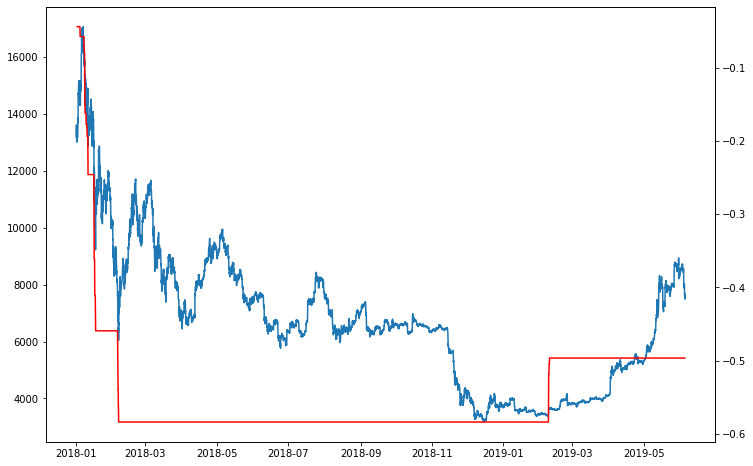

In [27]:
rolling_max = df.Close.rolling(300, min_periods=1).max()
daily_drawdown = df.Close/rolling_max - 1
max_drawdown = daily_drawdown.rolling(365*12, min_periods=12).min()
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(df.Close)
ax2 = ax1.twinx()
ax2.plot(max_drawdown, color='red')
plt.show()

In [22]:
s = pd.Series(data=[1,2,3,4,5], index=[11,22,33,44,55])
s

11    1
22    2
33    3
44    4
55    5
dtype: int64

In [25]:
s.loc[33]

3

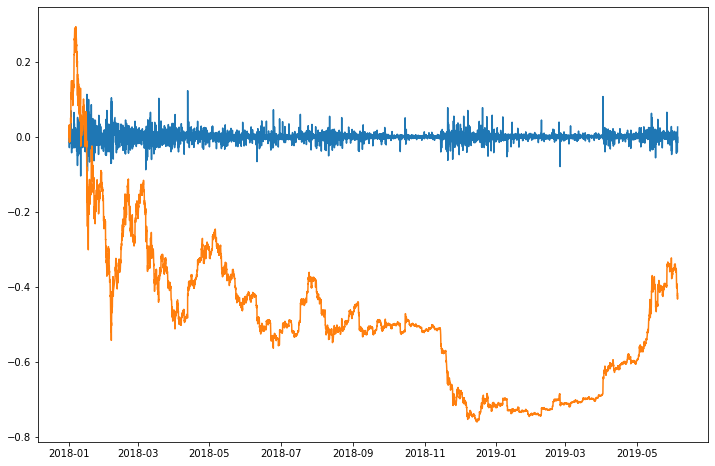

In [35]:
returns_a = df.Close.pct_change(1)

plt.figure(figsize=(12,8))
plt.plot(returns_a)
plt.plot(df.Close.divide(df.Close.iloc[0]) - 1)

In [28]:
data_path = Path.cwd() / f'data/ETHUSDT/training-data-2h.csv'
from_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
to_date = from_date + timedelta(days=520)

df1 = pd.read_csv(data_path)
df1['OpenTime'] = pd.to_datetime(df1['Open time'], format='%Y-%m-%d %H:%M:%S')
df1 = df1.drop(['Open time'], axis=1)
df1 = df1[(df1.OpenTime >= from_date) & (df1.OpenTime <= to_date)]
df1 = df1.set_index('OpenTime')

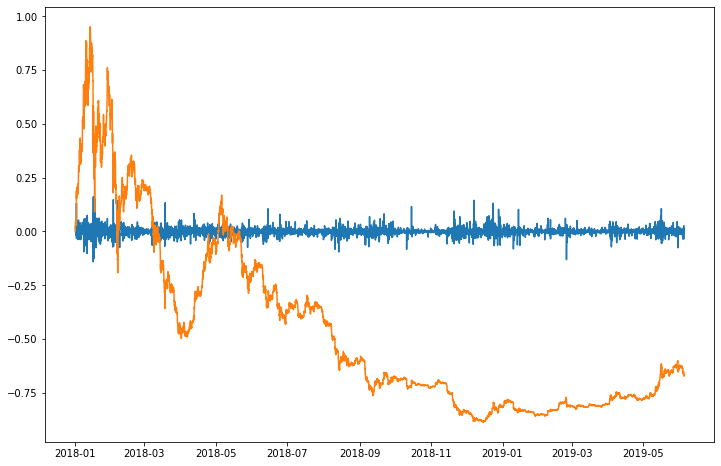

In [33]:
returns_b = df1.Close.pct_change(1)
plt.figure(figsize=(12,8))
plt.plot(returns_b)
plt.plot(df1.Close.divide(df1.Close.iloc[0]) - 1)

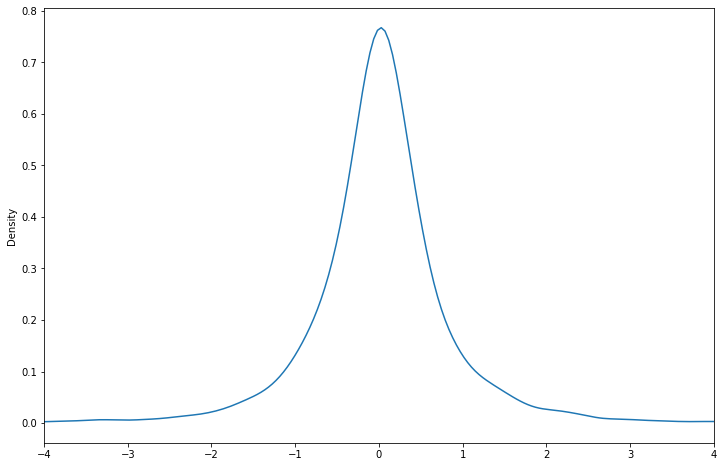

In [36]:
spread = returns_a - returns_b
z_score = (spread - spread.mean()) / spread.std()
plt.figure(figsize=(12,8))
plt.xlim(-4,4)
z_score.plot(kind='kde')
plt.show()